In [1]:
import pandas as pd

df = pd.read_csv('data/산재보상.csv', encoding='utf-8-sig')

In [2]:


import rhinoMorph
rn = rhinoMorph.startRhino()

#stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임"
stop_words= "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 해주시 때 임 하 있 되 않 었 사람 지 보 때 같 년 대하 주 말 일 위하 때문 말하 가 받 그렇 알 하 경우 가요"
stop_words = stop_words.split(' ')
stop_words[0:10]

filepath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages
classpath:  C:\Users\admin\AppData\Local\conda\conda\envs\kyu3.7\lib\site-packages\rhinoMorph/lib/rhino.jar
RHINO started!


['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [3]:
df

,Unnamed: 0,URL 주소,댓글작성자명,댓글작성일자,댓글 내용
0,0,https://www.youtube.com//watch?v=lgf1wMyk3BQ,양만춘,11개월 전,다니는 회사들에 임직원 단체보험 별도로 가입햇나 알아 보세요! 삼성. 교보...
1,1,https://www.youtube.com//watch?v=lgf1wMyk3BQ,직장인방송,11개월 전,산재치료 중 회사에서 퇴사를 강요 한다면 이렇게 대응하세요https://www.yo...
2,2,https://www.youtube.com//watch?v=lgf1wMyk3BQ,다크패밀리,1년 전(수정됨),좋은정보 감사합니다.저도 왼쪽 팔꿈치와 손목관절 골절로 요양 중입니다.아무래도 휴...
3,3,https://www.youtube.com//watch?v=lgf1wMyk3BQ,tsinghwa LEE,1년 전(수정됨),감사합니다
4,4,https://www.youtube.com//watch?v=lgf1wMyk3BQ,써튜브,1주 전,너무 감사합니다. 진짜 어려울때 도움받고 갑니다
...,...,...,...,...,...
744,744,https://www.youtube.com//watch?v=n1BUHwWxoUo,숨별,1년 전,인체공학분석 어디서 받을수있는건가요?근로공단이나 고용노동부는불승인사유로 사건 사고는...
745,745,https://www.youtube.com//watch?v=n1BUHwWxoUo,석구,9개월 전,안녕하세요 궁금한게 있어 댓글 드립니다 제가 일 그만둔지 1년정도 되어가는데요 산재...
746,746,https://www.youtube.com//watch?v=n1BUHwWxoUo,승미니,9개월 전,안녕하세요 제가 허리디스크로 산재처리를 하려고 하는데 혼자 하기엔 어려움이 많아서 ...
747,747,https://www.youtube.com//watch?v=h2_NB3dQsPs,Kim백수,2주 전,뒤 늦게 영상을 봤습니다명확한 설명 잘 봤습니다한가지 궁금한게 제가 경추 척수증으로...


In [4]:
import re
answer_sentences = []
for post in df['댓글 내용']:
    answer_sentences.extend(re.split('; |\.|\?|\!', post))
#title_sentences[0:100]


answer_sentences_nouns = []

for senten in answer_sentences:
    morphed_data_sentences = [noun_answer for noun_answer in rhinoMorph.onlyMorph_list(rn, senten, pos=['NNG', 'NNP'],combineN=True) if noun_answer not in stop_words]
    answer_sentences_nouns.append(morphed_data_sentences)
#sentences_nouns


answer_sentences_nouns_result = []

for i in answer_sentences_nouns:
    senten_list=[]
    for j in i:
        if len(j)== 1:
            continue
        senten_list.append(j)
    answer_sentences_nouns_result.append(senten_list)
#sentences_nouns_result

answer_result = []

for i in answer_sentences_nouns_result:
    if len(i) ==0:
        continue
    i = " ".join(i)
    answer_result.append(i)

#title_result

answer_result= ",".join(answer_result)
answer_result = answer_result.replace(","," ")
#title_result

final_answer = answer_result.split(" ")
#final_title

from collections import Counter

wordInfo_answer = Counter(final_answer)
#wordInfo_title

answer_top50 = dict(wordInfo_answer.most_common(50))
answer_top50

{'산재': 202,
 '회사': 200,
 '병원': 77,
 '산재처리': 74,
 '보상': 69,
 '안녕': 64,
 '신청': 59,
 '치료': 55,
 '영상': 48,
 '정도': 47,
 '노무사': 42,
 '수술': 41,
 '정보': 41,
 '업무': 40,
 '사고': 40,
 '상태': 39,
 '지금': 38,
 '골절': 36,
 '본인': 35,
 '부분': 35,
 '산재신청': 34,
 '승인': 34,
 '근로자': 33,
 '급여': 32,
 '손가락': 32,
 '산재보험': 32,
 '생각': 32,
 '치료비': 31,
 '도움': 30,
 '휴업급여': 29,
 '입원': 29,
 '문제': 29,
 '은정': 27,
 '상담': 27,
 '상황': 27,
 '사장': 27,
 '장애': 26,
 '진단': 26,
 '방법': 26,
 '아버지': 26,
 '과실': 26,
 '현장': 26,
 '보험': 25,
 '시간': 25,
 '감사': 25,
 '사업주': 25,
 '가능': 24,
 '질문': 24,
 '근로복지공단': 21,
 '직장': 21}

In [5]:
answer_top30 = dict(wordInfo_answer.most_common(30))
answer_top30

{'산재': 202,
 '회사': 200,
 '병원': 77,
 '산재처리': 74,
 '보상': 69,
 '안녕': 64,
 '신청': 59,
 '치료': 55,
 '영상': 48,
 '정도': 47,
 '노무사': 42,
 '수술': 41,
 '정보': 41,
 '업무': 40,
 '사고': 40,
 '상태': 39,
 '지금': 38,
 '골절': 36,
 '본인': 35,
 '부분': 35,
 '산재신청': 34,
 '승인': 34,
 '근로자': 33,
 '급여': 32,
 '손가락': 32,
 '산재보험': 32,
 '생각': 32,
 '치료비': 31,
 '도움': 30,
 '휴업급여': 29}

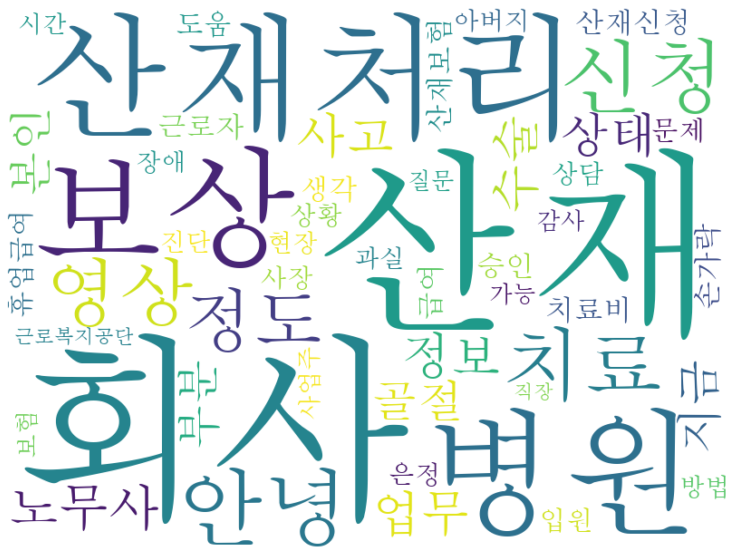

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='C:/windows/fonts/batang.ttc', width=800, height=600,background_color='white').generate_from_frequencies(answer_top50)
plt.figure(figsize=(30,10))
plt.imshow(cloud, interpolation='bilinear')  # 글자를 더 부드럽게 나오게 한다
plt.axis('off')                              # X축과 Y축의 위치 정보 off
plt.show()

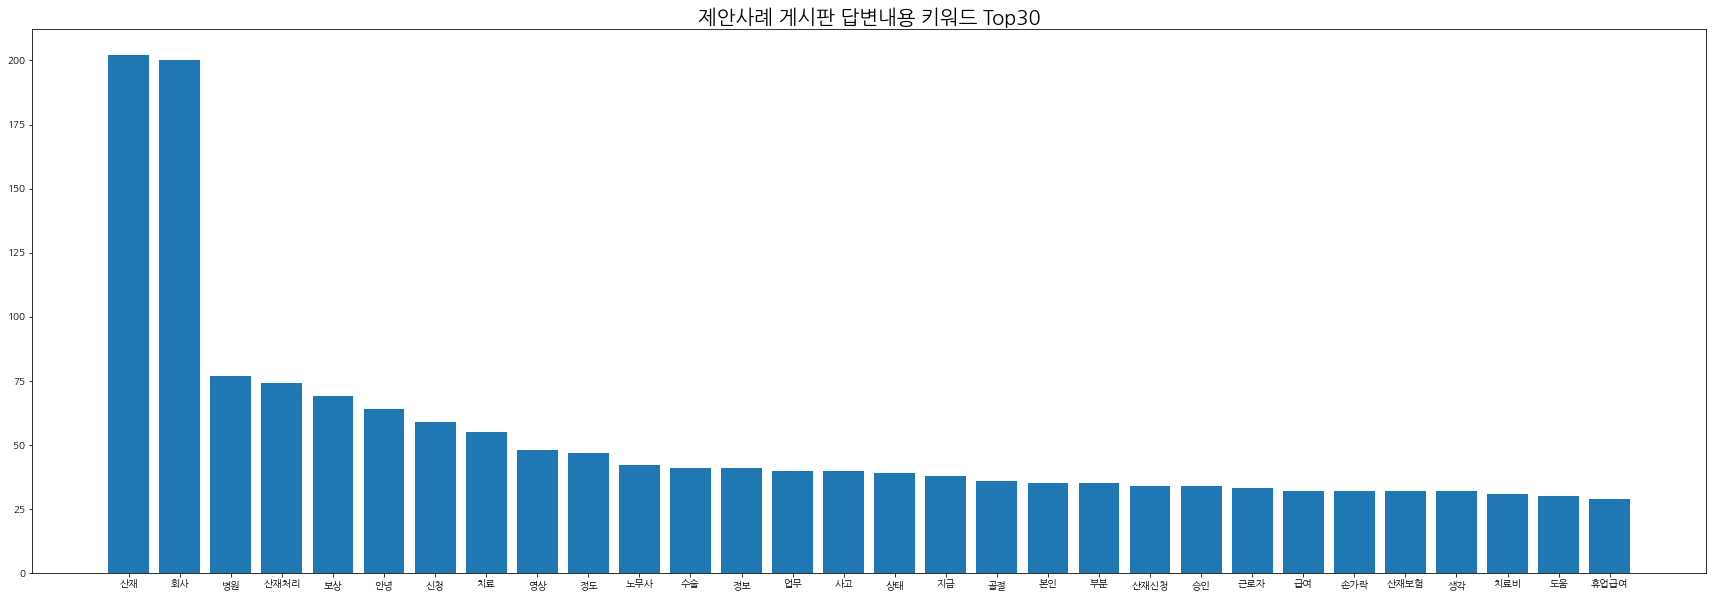

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

top_title_keys=[i for i in answer_top50.keys()]
top_title_values=[i for i in answer_top50.values()]

plt.figure(figsize= (30,10))
plt.title("제안사례 게시판 답변내용 키워드 Top30", fontsize=20)
plt.bar(list(top_title_keys[:30]), list(top_title_values[:30]))
plt.show()

In [8]:
#content_top_100 

answer_top50_word2id = {w: i for i, w in enumerate(answer_top50.keys())}
answer_top50_word2id

{'산재': 0,
 '회사': 1,
 '병원': 2,
 '산재처리': 3,
 '보상': 4,
 '안녕': 5,
 '신청': 6,
 '치료': 7,
 '영상': 8,
 '정도': 9,
 '노무사': 10,
 '수술': 11,
 '정보': 12,
 '업무': 13,
 '사고': 14,
 '상태': 15,
 '지금': 16,
 '골절': 17,
 '본인': 18,
 '부분': 19,
 '산재신청': 20,
 '승인': 21,
 '근로자': 22,
 '급여': 23,
 '손가락': 24,
 '산재보험': 25,
 '생각': 26,
 '치료비': 27,
 '도움': 28,
 '휴업급여': 29,
 '입원': 30,
 '문제': 31,
 '은정': 32,
 '상담': 33,
 '상황': 34,
 '사장': 35,
 '장애': 36,
 '진단': 37,
 '방법': 38,
 '아버지': 39,
 '과실': 40,
 '현장': 41,
 '보험': 42,
 '시간': 43,
 '감사': 44,
 '사업주': 45,
 '가능': 46,
 '질문': 47,
 '근로복지공단': 48,
 '직장': 49}

In [9]:
#content_top_100 

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'산재': 0,
 '회사': 1,
 '병원': 2,
 '산재처리': 3,
 '보상': 4,
 '안녕': 5,
 '신청': 6,
 '치료': 7,
 '영상': 8,
 '정도': 9,
 '노무사': 10,
 '수술': 11,
 '정보': 12,
 '업무': 13,
 '사고': 14,
 '상태': 15,
 '지금': 16,
 '골절': 17,
 '본인': 18,
 '부분': 19,
 '산재신청': 20,
 '승인': 21,
 '근로자': 22,
 '급여': 23,
 '손가락': 24,
 '산재보험': 25,
 '생각': 26,
 '치료비': 27,
 '도움': 28,
 '휴업급여': 29}

In [10]:

answer_top30_word2id = {w: i for i, w in enumerate(answer_top30.keys())}
answer_top30_word2id

{'산재': 0,
 '회사': 1,
 '병원': 2,
 '산재처리': 3,
 '보상': 4,
 '안녕': 5,
 '신청': 6,
 '치료': 7,
 '영상': 8,
 '정도': 9,
 '노무사': 10,
 '수술': 11,
 '정보': 12,
 '업무': 13,
 '사고': 14,
 '상태': 15,
 '지금': 16,
 '골절': 17,
 '본인': 18,
 '부분': 19,
 '산재신청': 20,
 '승인': 21,
 '근로자': 22,
 '급여': 23,
 '손가락': 24,
 '산재보험': 25,
 '생각': 26,
 '치료비': 27,
 '도움': 28,
 '휴업급여': 29}

In [11]:
answer_top50_id2word = {i: w for i, w in enumerate(answer_top50.keys())}
answer_top50_id2word

{0: '산재',
 1: '회사',
 2: '병원',
 3: '산재처리',
 4: '보상',
 5: '안녕',
 6: '신청',
 7: '치료',
 8: '영상',
 9: '정도',
 10: '노무사',
 11: '수술',
 12: '정보',
 13: '업무',
 14: '사고',
 15: '상태',
 16: '지금',
 17: '골절',
 18: '본인',
 19: '부분',
 20: '산재신청',
 21: '승인',
 22: '근로자',
 23: '급여',
 24: '손가락',
 25: '산재보험',
 26: '생각',
 27: '치료비',
 28: '도움',
 29: '휴업급여',
 30: '입원',
 31: '문제',
 32: '은정',
 33: '상담',
 34: '상황',
 35: '사장',
 36: '장애',
 37: '진단',
 38: '방법',
 39: '아버지',
 40: '과실',
 41: '현장',
 42: '보험',
 43: '시간',
 44: '감사',
 45: '사업주',
 46: '가능',
 47: '질문',
 48: '근로복지공단',
 49: '직장'}

In [12]:
answer_top30_id2word = {i: w for i, w in enumerate(answer_top30.keys())}
answer_top30_id2word

{0: '산재',
 1: '회사',
 2: '병원',
 3: '산재처리',
 4: '보상',
 5: '안녕',
 6: '신청',
 7: '치료',
 8: '영상',
 9: '정도',
 10: '노무사',
 11: '수술',
 12: '정보',
 13: '업무',
 14: '사고',
 15: '상태',
 16: '지금',
 17: '골절',
 18: '본인',
 19: '부분',
 20: '산재신청',
 21: '승인',
 22: '근로자',
 23: '급여',
 24: '손가락',
 25: '산재보험',
 26: '생각',
 27: '치료비',
 28: '도움',
 29: '휴업급여'}

In [13]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_50 = np.zeros((50, 50), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top50_word2id.items():
        if wi in sentence:
            for wj, j in answer_top50_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_50[i][j] += 1
answer_adjacent_matrix_50

array([[ 0, 35,  8, ...,  4,  4,  6],
       [35,  0, 11, ...,  4,  3,  2],
       [ 8, 11,  0, ...,  3,  1,  0],
       ...,
       [ 4,  4,  3, ...,  0,  0,  0],
       [ 4,  3,  1, ...,  0,  0,  0],
       [ 6,  2,  0, ...,  0,  0,  0]])

In [14]:
answer_sentences_nouns_result

[['회사', '임직원', '단체보험', '별도', '가입'],
 ['삼성'],
 ['교보'],
 ['손보사', '다면대부분', '보험', '수급자', '회사', '확률'],
 ['참고'],
 [],
 [],
 ['산재치료', '회사', '퇴사', '강요'],
 [],
 [],
 ['근로복지공단', '요양급여신청서', '휴업급여청구서'],
 [],
 [],
 [],
 ['은정'],
 ['왼쪽', '팔꿈치', '손목관절', '골절', '요양'],
 ['장해',
  '남을',
  '장해보상',
  '신청',
  '요양기간',
  '후에',
  '가능',
  '골절',
  '금속',
  '제거',
  '수술',
  '후에가능'],
 ['요양기간', '치료', '종결', '차후', '관절', '금속제거', '수술', '산재신청'],
 [],
 [],
 [],
 ['도움'],
 ['직방', '산재신청', '처리', '직방', '승인', '몇일'],
 [],
 [],
 ['안녕', '질문', '질문'],
 [],
 ['지금', '병원비', '급여'],
 ['지불'],
 [],
 [],
 ['보상'],
 [],
 ['유익', '정보'],
 ['직장', '우울증', '투병', '중인', '가해자', '원어민', '교사', '국외', '영구', '녹취', '기록'],
 ['산재', '신청'],
 [],
 [],
 [],
 [],
 ['영상'],
 ['산재보장', '신청방법'],
 [],
 ['은정', '오른손', '검지', '첫마디', '위쪽', '혈관', '신경', '접합수술', '중지', '첫마디', '개방', '골절'],
 ['중지',
  '저번주',
  '검지',
  '이번주',
  '제거',
  '재활',
  '절단',
  '부위',
  '통증',
  '접합',
  '수술',
  '외관',
  '손가락',
  '나중',
  '걱정',
  '등급',
  '보통'],
 ['장해급여', '평균임금등급', '평균임금', '휴업급여', '일평균'],
 [],
 ['도움'],


In [15]:
import numpy as np

# 50 단어 인접행렬
answer_adjacent_matrix_30 = np.zeros((30, 30), int)
for sentence in answer_sentences_nouns_result:
    for wi, i in answer_top30_word2id.items():
        if wi in sentence:
            for wj, j in answer_top30_word2id.items():
                if i != j and wj in sentence:
                    answer_adjacent_matrix_30[i][j] += 1
answer_adjacent_matrix_30

array([[ 0, 35,  8,  4, 15,  9, 19, 13,  5,  5,  8,  6,  3,  4,  4,  4,
         7,  6,  2,  1,  3,  7,  3,  5,  5,  5,  3,  6,  3,  4],
       [35,  0, 11, 12, 10,  6,  9, 10,  4,  7,  6,  4,  0,  8, 10,  3,
         8,  2,  3,  7, 11,  8,  4,  4,  6,  2,  3,  6,  3,  3],
       [ 8, 11,  0, 11,  1,  1,  2,  7,  1,  3,  2,  2,  0,  2,  1,  0,
         4,  3,  0,  0,  4,  2,  0,  1,  2,  1,  1,  1,  1,  2],
       [ 4, 12, 11,  0,  0,  2,  2,  3,  1,  2,  1,  2,  0,  4,  7,  2,
         1,  4,  1,  5,  0,  1,  1,  3,  3,  1,  0,  2,  1,  2],
       [15, 10,  1,  0,  0,  1,  0,  5,  0,  4,  0,  1,  1,  1,  2,  3,
         5,  0,  3,  2,  0,  0,  0,  1,  2,  2,  2,  0,  0,  0],
       [ 9,  6,  1,  2,  1,  0,  5,  3,  2,  2,  5,  2,  3,  1,  2,  3,
         2,  1,  0,  1,  2,  1,  1,  1,  1,  0,  0,  1,  1,  2],
       [19,  9,  2,  2,  0,  5,  0,  2,  2,  4,  4,  5,  1,  2,  0,  1,
         0,  3,  2,  0,  0,  1,  3,  4,  1,  1,  0,  0,  0,  3],
       [13, 10,  7,  3,  5,  3,  2,  0,  

In [16]:
answer_adjacent_matrix_50.shape, answer_adjacent_matrix_30.shape

((50, 50), (30, 30))

In [17]:
import networkx as nx
answer_network_30 = nx.from_numpy_matrix(answer_adjacent_matrix_30)
list(answer_network_30.adjacency())

[(0,
  {1: {'weight': 35},
   2: {'weight': 8},
   3: {'weight': 4},
   4: {'weight': 15},
   5: {'weight': 9},
   6: {'weight': 19},
   7: {'weight': 13},
   8: {'weight': 5},
   9: {'weight': 5},
   10: {'weight': 8},
   11: {'weight': 6},
   12: {'weight': 3},
   13: {'weight': 4},
   14: {'weight': 4},
   15: {'weight': 4},
   16: {'weight': 7},
   17: {'weight': 6},
   18: {'weight': 2},
   19: {'weight': 1},
   20: {'weight': 3},
   21: {'weight': 7},
   22: {'weight': 3},
   23: {'weight': 5},
   24: {'weight': 5},
   25: {'weight': 5},
   26: {'weight': 3},
   27: {'weight': 6},
   28: {'weight': 3},
   29: {'weight': 4}}),
 (1,
  {0: {'weight': 35},
   2: {'weight': 11},
   3: {'weight': 12},
   4: {'weight': 10},
   5: {'weight': 6},
   6: {'weight': 9},
   7: {'weight': 10},
   8: {'weight': 4},
   9: {'weight': 7},
   10: {'weight': 6},
   11: {'weight': 4},
   13: {'weight': 8},
   14: {'weight': 10},
   15: {'weight': 3},
   16: {'weight': 8},
   17: {'weight': 2},
   18:

In [18]:
answer_network_50 = nx.from_numpy_matrix(answer_adjacent_matrix_50)
list(answer_network_50.adjacency())

[(0,
  {1: {'weight': 35},
   2: {'weight': 8},
   3: {'weight': 4},
   4: {'weight': 15},
   5: {'weight': 9},
   6: {'weight': 19},
   7: {'weight': 13},
   8: {'weight': 5},
   9: {'weight': 5},
   10: {'weight': 8},
   11: {'weight': 6},
   12: {'weight': 3},
   13: {'weight': 4},
   14: {'weight': 4},
   15: {'weight': 4},
   16: {'weight': 7},
   17: {'weight': 6},
   18: {'weight': 2},
   19: {'weight': 1},
   20: {'weight': 3},
   21: {'weight': 7},
   22: {'weight': 3},
   23: {'weight': 5},
   24: {'weight': 5},
   25: {'weight': 5},
   26: {'weight': 3},
   27: {'weight': 6},
   28: {'weight': 3},
   29: {'weight': 4},
   30: {'weight': 7},
   31: {'weight': 2},
   32: {'weight': 1},
   33: {'weight': 1},
   34: {'weight': 5},
   35: {'weight': 2},
   36: {'weight': 3},
   37: {'weight': 4},
   38: {'weight': 3},
   39: {'weight': 3},
   40: {'weight': 9},
   41: {'weight': 5},
   42: {'weight': 6},
   43: {'weight': 2},
   44: {'weight': 4},
   45: {'weight': 4},
   46: {'w

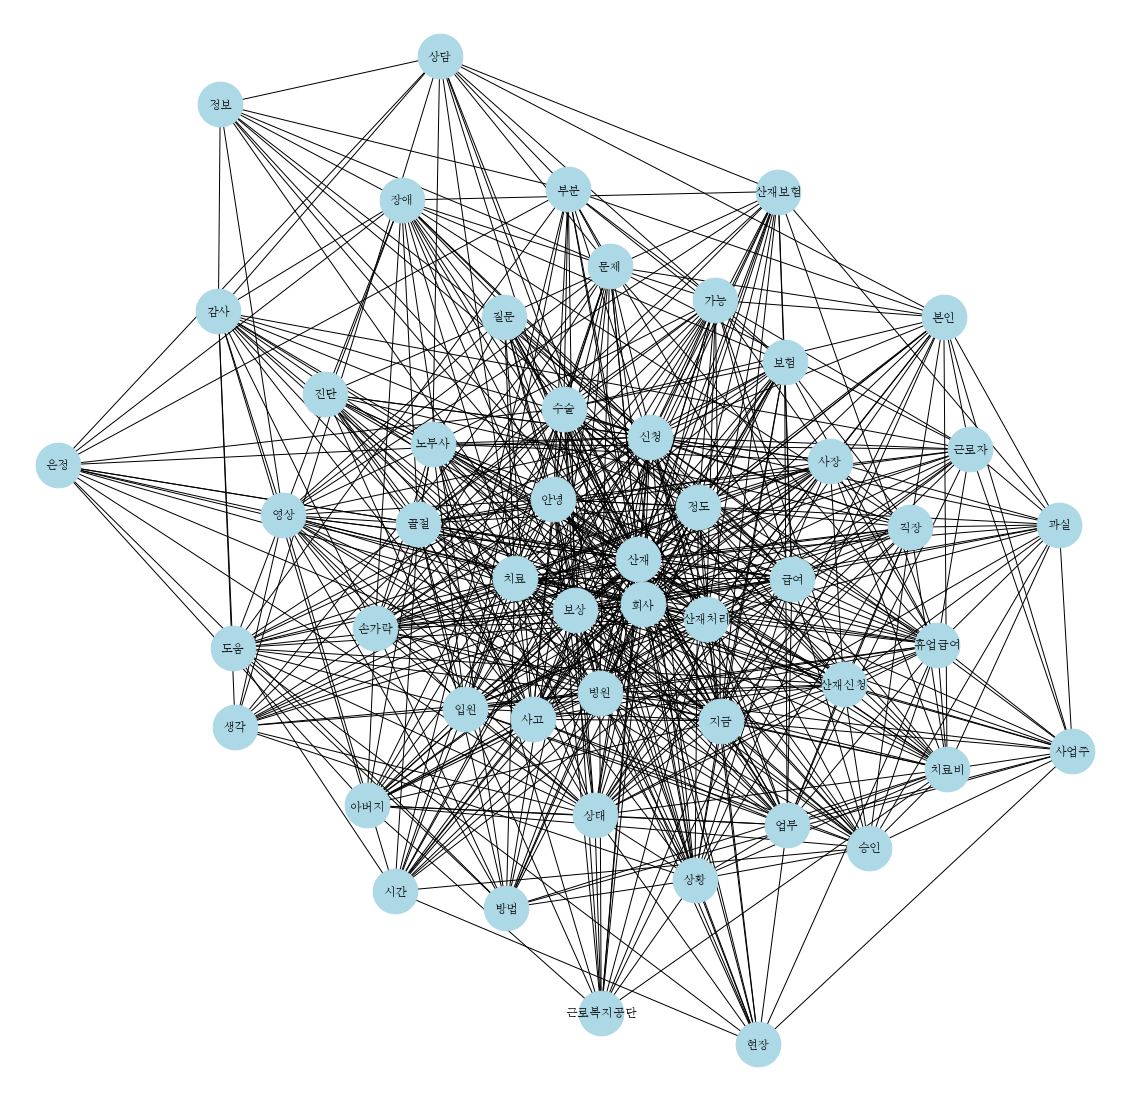

In [19]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(20, 20)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 50개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_50, labels=answer_top50_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

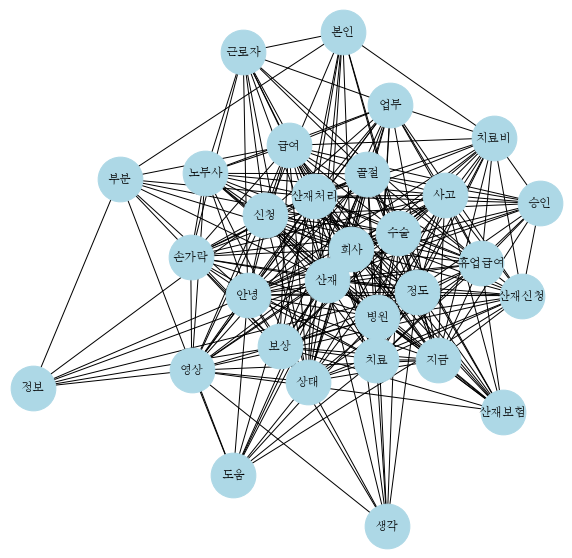

In [20]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
from matplotlib import rc

font_path="C:/Windows/Fonts/batang.ttc"
font_name = fm.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

fig = plt.figure()
fig.set_size_inches(10, 10)
ax = fig.add_subplot(1, 1, 1)
ax.axis("off")
option = {
    'node_color' : 'lightblue',
    'node_size' : 2000,
    'size' : 2
}

'''
# 키워드 30개로 네트워크
'''

#G1=nx.Graph(san_network, labels=san_id2word, font_family=font_name, ax=ax)
nx.draw(answer_network_30, labels=answer_top30_id2word, font_family=font_name, ax=ax, **option)
#nx.draw(san_network, labels=san_id2word, font_family=font_name, ax=ax, **option)

#nx.write_graphml(G1, 'graphfile.graphml')
#nx.write_gexf(G1, 'sanjae_insurance.gexf')
plt.show()

# 근접중심성

In [21]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.4152542372881356,
 1: 0.4083333333333333,
 2: 0.5833333333333334,
 3: 0.550561797752809,
 4: 0.5833333333333334,
 5: 0.6049382716049383,
 6: 0.550561797752809,
 7: 0.5157894736842106,
 8: 0.5903614457831325,
 9: 0.5212765957446809,
 10: 0.532608695652174,
 11: 0.49,
 12: 0.49,
 13: 0.5764705882352941,
 14: 0.5384615384615384,
 15: 0.6125,
 16: 0.6125,
 17: 0.5903614457831325,
 18: 0.550561797752809,
 19: 0.5384615384615384,
 20: 0.5444444444444444,
 21: 0.5697674418604651,
 22: 0.5157894736842106,
 23: 0.5764705882352941,
 24: 0.5632183908045977,
 25: 0.5632183908045977,
 26: 0.5444444444444444,
 27: 0.5568181818181818,
 28: 0.532608695652174,
 29: 0.5268817204301075,
 30: 0.6049382716049383,
 31: 0.5632183908045977,
 32: 0.5444444444444444,
 33: 0.5104166666666666,
 34: 0.6049382716049383,
 35: 0.5632183908045977,
 36: 0.5975609756097561,
 37: 0.5,
 38: 0.5384615384615384,
 39: 0.5764705882352941,
 40: 0.44545454545454544,
 41: 0.5157894736842106,
 42: 0.5764705882352941,
 43: 0

In [22]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.32222222222222224,
 1: 0.29591836734693877,
 2: 0.5576923076923077,
 3: 0.5370370370370371,
 4: 0.5087719298245614,
 5: 0.6041666666666666,
 6: 0.5087719298245614,
 7: 0.43283582089552236,
 8: 0.5576923076923077,
 9: 0.4915254237288136,
 10: 0.5087719298245614,
 11: 0.46774193548387094,
 12: 0.4393939393939394,
 13: 0.5471698113207547,
 14: 0.48333333333333334,
 15: 0.5918367346938775,
 16: 0.5471698113207547,
 17: 0.5576923076923077,
 18: 0.48333333333333334,
 19: 0.4603174603174603,
 20: 0.5370370370370371,
 21: 0.5272727272727272,
 22: 0.5,
 23: 0.58,
 24: 0.5178571428571429,
 25: 0.5370370370370371,
 26: 0.4603174603174603,
 27: 0.5370370370370371,
 28: 0.5087719298245614,
 29: 0.48333333333333334}

# 연결중심성

In [23]:
#Degree
nx.degree_centrality(answer_network_50)

{0: 0.9999999999999999,
 1: 0.9591836734693877,
 2: 0.7959183673469387,
 3: 0.7142857142857142,
 4: 0.6530612244897959,
 5: 0.7346938775510203,
 6: 0.7551020408163265,
 7: 0.6938775510204082,
 8: 0.5510204081632653,
 9: 0.6326530612244897,
 10: 0.5102040816326531,
 11: 0.6122448979591836,
 12: 0.22448979591836732,
 13: 0.5306122448979591,
 14: 0.5306122448979591,
 15: 0.6326530612244897,
 16: 0.6938775510204082,
 17: 0.6122448979591836,
 18: 0.4081632653061224,
 19: 0.3469387755102041,
 20: 0.4897959183673469,
 21: 0.44897959183673464,
 22: 0.3877551020408163,
 23: 0.5918367346938775,
 24: 0.5102040816326531,
 25: 0.3877551020408163,
 26: 0.3061224489795918,
 27: 0.4897959183673469,
 28: 0.36734693877551017,
 29: 0.5510204081632653,
 30: 0.5918367346938775,
 31: 0.4081632653061224,
 32: 0.2857142857142857,
 33: 0.2857142857142857,
 34: 0.5102040816326531,
 35: 0.4693877551020408,
 36: 0.42857142857142855,
 37: 0.32653061224489793,
 38: 0.32653061224489793,
 39: 0.42857142857142855,
 40

In [24]:
#Degree
nx.degree_centrality(answer_network_30)

{0: 1.0,
 1: 0.9655172413793103,
 2: 0.8275862068965517,
 3: 0.8620689655172413,
 4: 0.6206896551724138,
 5: 0.896551724137931,
 6: 0.7241379310344828,
 7: 0.7586206896551724,
 8: 0.6551724137931034,
 9: 0.7586206896551724,
 10: 0.5517241379310345,
 11: 0.7586206896551724,
 12: 0.24137931034482757,
 13: 0.6206896551724138,
 14: 0.6551724137931034,
 15: 0.7931034482758621,
 16: 0.7241379310344828,
 17: 0.7241379310344828,
 18: 0.3793103448275862,
 19: 0.3448275862068966,
 20: 0.5862068965517241,
 21: 0.48275862068965514,
 22: 0.4482758620689655,
 23: 0.7931034482758621,
 24: 0.6206896551724138,
 25: 0.48275862068965514,
 26: 0.3103448275862069,
 27: 0.5862068965517241,
 28: 0.3793103448275862,
 29: 0.6896551724137931}

# 위세중심성

In [25]:
#Eigenvector
nx.eigenvector_centrality(answer_network_50, weight='weight')

{0: 0.47689646327718244,
 1: 0.461288752227303,
 2: 0.2017933528281884,
 3: 0.1736868922948326,
 4: 0.1843929263803816,
 5: 0.1451347668003908,
 6: 0.22226856522327015,
 7: 0.22299919598764092,
 8: 0.08057199124915693,
 9: 0.1522156469991933,
 10: 0.11734993170165653,
 11: 0.12990550888919236,
 12: 0.033519322494374754,
 13: 0.10909660152050991,
 14: 0.13764116978614888,
 15: 0.08690958865162042,
 16: 0.15821974494213897,
 17: 0.11630990316799597,
 18: 0.05852513053681252,
 19: 0.06478695011117497,
 20: 0.12349540202331917,
 21: 0.11416579873248983,
 22: 0.06685349097110153,
 23: 0.09920022944372074,
 24: 0.09926120499538242,
 25: 0.06306438492085086,
 26: 0.056011812686440725,
 27: 0.10367075805976973,
 28: 0.05473708679728881,
 29: 0.09552558863545517,
 30: 0.1214076144607732,
 31: 0.05985909944497221,
 32: 0.026088460769064396,
 33: 0.03432293751537764,
 34: 0.07530212356572381,
 35: 0.07556704515217956,
 36: 0.05494688859051052,
 37: 0.06478434258592558,
 38: 0.07345956145669776,
 

In [26]:
#Eigenvector
nx.eigenvector_centrality(answer_network_30, weight='weight')

{0: 0.48841400408823327,
 1: 0.48648350214948877,
 2: 0.20755268561008883,
 3: 0.19138560527534634,
 4: 0.19633313770848418,
 5: 0.1585211297263933,
 6: 0.2283595009961918,
 7: 0.24214805499547304,
 8: 0.08734814919116388,
 9: 0.16678695249858863,
 10: 0.12553568216902372,
 11: 0.13856507924427675,
 12: 0.031899848998572684,
 13: 0.12134475790975113,
 14: 0.15738872491204528,
 15: 0.09592202949564378,
 16: 0.17116674119018824,
 17: 0.12110371339882672,
 18: 0.05753171916669955,
 19: 0.0694591499034041,
 20: 0.1342439397345498,
 21: 0.12560087080233168,
 22: 0.06656195298841781,
 23: 0.11007308172070435,
 24: 0.11172647442123383,
 25: 0.06788412284892285,
 26: 0.06107417890813941,
 27: 0.11489141522244205,
 28: 0.05691385210207051,
 29: 0.10390171784467282}

# 근접중심성

In [27]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_50)

{0: 0.30932365714076826,
 1: 0.30508973421147584,
 2: 0.2857757842907442,
 3: 0.2740667280659115,
 4: 0.26469139946985293,
 5: 0.27734603490711995,
 6: 0.28035395978049776,
 7: 0.2710666294127133,
 8: 0.24564177201010415,
 9: 0.26106705298135685,
 10: 0.2368442109700638,
 11: 0.2574110630710846,
 12: 0.14753810296410083,
 13: 0.24131736798741465,
 14: 0.24133356643837836,
 15: 0.26096540908084676,
 16: 0.2708918019162582,
 17: 0.2572713857982548,
 18: 0.21173903680245668,
 19: 0.1934377956249177,
 20: 0.23226706602303956,
 21: 0.2224933412830573,
 22: 0.20618820413602665,
 23: 0.2536648047783901,
 24: 0.2371128949736349,
 25: 0.20637492239454586,
 26: 0.180268262944396,
 27: 0.23213467609434643,
 28: 0.20018470613022968,
 29: 0.24548472491517148,
 30: 0.2536142359361109,
 31: 0.2117845462493436,
 32: 0.17286716441239425,
 33: 0.1720602187630427,
 34: 0.2369784151256909,
 35: 0.22760444142949324,
 36: 0.21711764373503145,
 37: 0.1871845377360724,
 38: 0.18712749211097995,
 39: 0.2174338

In [28]:
#Current Flow Closeness
nx.current_flow_closeness_centrality(answer_network_30)

{0: 0.36935125045095835,
 1: 0.36404224801058793,
 2: 0.34152265891614325,
 3: 0.34769697506127695,
 4: 0.2998152834847932,
 5: 0.3535375323094081,
 6: 0.3225762860967945,
 7: 0.32891226639786014,
 8: 0.30785098194522964,
 9: 0.32940608973369234,
 10: 0.2820186132156069,
 11: 0.3292599614553745,
 12: 0.16910384663351402,
 13: 0.2995643642427592,
 14: 0.3073090696763784,
 15: 0.335705659201452,
 16: 0.3218748068972944,
 17: 0.32200375791044133,
 18: 0.22831584636137392,
 19: 0.21447158946961173,
 20: 0.2909398092188733,
 21: 0.2626576105566751,
 22: 0.25183618833137905,
 23: 0.33564233332510474,
 24: 0.29980830308454415,
 25: 0.2629856812899809,
 26: 0.20162735052843977,
 27: 0.2910823558108157,
 28: 0.22873037182526132,
 29: 0.3146548323157625}

In [29]:
#Closeness
nx.closeness_centrality(answer_network_50, distance='weight')

{0: 0.4152542372881356,
 1: 0.4083333333333333,
 2: 0.5833333333333334,
 3: 0.550561797752809,
 4: 0.5833333333333334,
 5: 0.6049382716049383,
 6: 0.550561797752809,
 7: 0.5157894736842106,
 8: 0.5903614457831325,
 9: 0.5212765957446809,
 10: 0.532608695652174,
 11: 0.49,
 12: 0.49,
 13: 0.5764705882352941,
 14: 0.5384615384615384,
 15: 0.6125,
 16: 0.6125,
 17: 0.5903614457831325,
 18: 0.550561797752809,
 19: 0.5384615384615384,
 20: 0.5444444444444444,
 21: 0.5697674418604651,
 22: 0.5157894736842106,
 23: 0.5764705882352941,
 24: 0.5632183908045977,
 25: 0.5632183908045977,
 26: 0.5444444444444444,
 27: 0.5568181818181818,
 28: 0.532608695652174,
 29: 0.5268817204301075,
 30: 0.6049382716049383,
 31: 0.5632183908045977,
 32: 0.5444444444444444,
 33: 0.5104166666666666,
 34: 0.6049382716049383,
 35: 0.5632183908045977,
 36: 0.5975609756097561,
 37: 0.5,
 38: 0.5384615384615384,
 39: 0.5764705882352941,
 40: 0.44545454545454544,
 41: 0.5157894736842106,
 42: 0.5764705882352941,
 43: 0

In [30]:
#Closeness
nx.closeness_centrality(answer_network_30, distance='weight')

{0: 0.32222222222222224,
 1: 0.29591836734693877,
 2: 0.5576923076923077,
 3: 0.5370370370370371,
 4: 0.5087719298245614,
 5: 0.6041666666666666,
 6: 0.5087719298245614,
 7: 0.43283582089552236,
 8: 0.5576923076923077,
 9: 0.4915254237288136,
 10: 0.5087719298245614,
 11: 0.46774193548387094,
 12: 0.4393939393939394,
 13: 0.5471698113207547,
 14: 0.48333333333333334,
 15: 0.5918367346938775,
 16: 0.5471698113207547,
 17: 0.5576923076923077,
 18: 0.48333333333333334,
 19: 0.4603174603174603,
 20: 0.5370370370370371,
 21: 0.5272727272727272,
 22: 0.5,
 23: 0.58,
 24: 0.5178571428571429,
 25: 0.5370370370370371,
 26: 0.4603174603174603,
 27: 0.5370370370370371,
 28: 0.5087719298245614,
 29: 0.48333333333333334}

# 매개중심성

In [31]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_50)

{0: 0.07525277523986926,
 1: 0.07039643186185106,
 2: 0.05767305453889863,
 3: 0.050762407326062985,
 4: 0.05314307251383565,
 5: 0.05325393011270935,
 6: 0.05673235788136765,
 7: 0.04853045686285909,
 8: 0.04368039773940028,
 9: 0.044605504207986174,
 10: 0.03680483425733573,
 11: 0.04238643299167423,
 12: 0.019030937809699527,
 13: 0.03624483469741883,
 14: 0.036699966087325966,
 15: 0.04465480692739142,
 16: 0.04775788062043028,
 17: 0.043124852558372416,
 18: 0.033310512013784904,
 19: 0.030297995314394036,
 20: 0.03402896116219589,
 21: 0.03158199418569755,
 22: 0.029565840329694868,
 23: 0.0384394038080625,
 24: 0.034387907554149055,
 25: 0.027863232385080584,
 26: 0.022748575655782245,
 27: 0.03460198540245379,
 28: 0.02865895556414689,
 29: 0.03786517331989194,
 30: 0.04206545845972949,
 31: 0.03484633824500207,
 32: 0.022655630073767214,
 33: 0.027532355497024222,
 34: 0.0405113985837456,
 35: 0.0320589660806543,
 36: 0.03388337599730218,
 37: 0.023122932765029046,
 38: 0.0262

In [32]:
#Current Flow Betweenness
nx.current_flow_betweenness_centrality(answer_network_30)

{0: 0.08885115947019731,
 1: 0.08064179613271254,
 2: 0.06534135891845261,
 3: 0.07053608704014523,
 4: 0.06207392775923477,
 5: 0.0763760671076907,
 6: 0.06291250637041172,
 7: 0.059215864520182585,
 8: 0.06067760716724766,
 9: 0.06583966257542714,
 10: 0.04166087330331745,
 11: 0.0633749654010501,
 12: 0.02357047635636635,
 13: 0.046912453770142956,
 14: 0.04948912073481455,
 15: 0.06630682787325792,
 16: 0.05266473444848464,
 17: 0.05545292961249222,
 18: 0.035623944589427727,
 19: 0.037752492600459625,
 20: 0.04685163020915184,
 21: 0.03553378658213296,
 22: 0.03695173943993871,
 23: 0.06202821593582653,
 24: 0.046176682681235474,
 25: 0.03601981428541012,
 26: 0.02445089504688124,
 27: 0.04521998408635624,
 28: 0.03266685749725715,
 29: 0.05082289484997512}

In [33]:
#Communicability Betweenness
nx.communicability_betweenness_centrality(answer_network_50)

{0: 0.8031692515353701,
 1: 0.7857801625956494,
 2: 0.6752308140138781,
 3: 0.6118238852137753,
 4: 0.5016436870252596,
 5: 0.6317209652406449,
 6: 0.6262578648945553,
 7: 0.603631905833721,
 8: 0.4192101283759065,
 9: 0.5433535731631409,
 10: 0.4030504943238009,
 11: 0.5254768076048614,
 12: 0.08538009147336596,
 13: 0.44346832565145894,
 14: 0.43578570661070903,
 15: 0.5375954018413436,
 16: 0.6034464387016697,
 17: 0.5185831349628829,
 18: 0.2538953425013935,
 19: 0.18775052563009909,
 20: 0.3890096078558171,
 21: 0.34684326265395266,
 22: 0.25517256933826216,
 23: 0.5262686138466429,
 24: 0.4231752090327512,
 25: 0.2790938466391309,
 26: 0.1805505627759009,
 27: 0.38628520977716624,
 28: 0.23465974675664938,
 29: 0.4667109069236039,
 30: 0.4949218281550843,
 31: 0.25109666668916353,
 32: 0.1537940533226982,
 33: 0.1134572148339212,
 34: 0.37157206962478817,
 35: 0.37424279321124077,
 36: 0.29116396025370667,
 37: 0.2062350744343211,
 38: 0.18138320612834133,
 39: 0.3293018319309734

In [34]:
G1_answer_50words=nx.Graph(answer_network_50, labels=answer_top50_word2id, font_family=font_name, ax=ax)
G1_answer_50words

In [35]:
G1_answer_30words=nx.Graph(answer_network_30, labels=answer_top30_word2id, font_family=font_name, ax=ax)
G1_answer_30words

In [36]:
# nx.write_gexf(G1_answer_50words, '산업재해보상보험_50keyword_graph.gexf')

In [37]:
# nx.write_gexf(G1_answer_30words, '산업재해보상보험_30keyword_graph.gexf')

In [38]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top50_word2id.keys())
values = list(nx.degree_centrality(answer_network_50).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'산재': 0.9999999999999999,
 '회사': 0.9591836734693877,
 '병원': 0.7959183673469387,
 '산재처리': 0.7142857142857142,
 '보상': 0.6530612244897959,
 '안녕': 0.7346938775510203,
 '신청': 0.7551020408163265,
 '치료': 0.6938775510204082,
 '영상': 0.5510204081632653,
 '정도': 0.6326530612244897,
 '노무사': 0.5102040816326531,
 '수술': 0.6122448979591836,
 '정보': 0.22448979591836732,
 '업무': 0.5306122448979591,
 '사고': 0.5306122448979591,
 '상태': 0.6326530612244897,
 '지금': 0.6938775510204082,
 '골절': 0.6122448979591836,
 '본인': 0.4081632653061224,
 '부분': 0.3469387755102041,
 '산재신청': 0.4897959183673469,
 '승인': 0.44897959183673464,
 '근로자': 0.3877551020408163,
 '급여': 0.5918367346938775,
 '손가락': 0.5102040816326531,
 '산재보험': 0.3877551020408163,
 '생각': 0.3061224489795918,
 '치료비': 0.4897959183673469,
 '도움': 0.36734693877551017,
 '휴업급여': 0.5510204081632653,
 '입원': 0.5918367346938775,
 '문제': 0.4081632653061224,
 '은정': 0.2857142857142857,
 '상담': 0.2857142857142857,
 '상황': 0.5102040816326531,
 '사장': 0.4693877551020408,
 '장애': 0.4285

In [39]:
#Degree -  ------------------------- 연결중심성
import networkx

labels = list(answer_top30_word2id.keys())
values = list(nx.degree_centrality(answer_network_30).values())

연결중심성=[]
for i, j in zip(labels,values):
    연결중심성.append((i,j))
연결중심성 = dict(연결중심성)
연결중심성

{'산재': 1.0,
 '회사': 0.9655172413793103,
 '병원': 0.8275862068965517,
 '산재처리': 0.8620689655172413,
 '보상': 0.6206896551724138,
 '안녕': 0.896551724137931,
 '신청': 0.7241379310344828,
 '치료': 0.7586206896551724,
 '영상': 0.6551724137931034,
 '정도': 0.7586206896551724,
 '노무사': 0.5517241379310345,
 '수술': 0.7586206896551724,
 '정보': 0.24137931034482757,
 '업무': 0.6206896551724138,
 '사고': 0.6551724137931034,
 '상태': 0.7931034482758621,
 '지금': 0.7241379310344828,
 '골절': 0.7241379310344828,
 '본인': 0.3793103448275862,
 '부분': 0.3448275862068966,
 '산재신청': 0.5862068965517241,
 '승인': 0.48275862068965514,
 '근로자': 0.4482758620689655,
 '급여': 0.7931034482758621,
 '손가락': 0.6206896551724138,
 '산재보험': 0.48275862068965514,
 '생각': 0.3103448275862069,
 '치료비': 0.5862068965517241,
 '도움': 0.3793103448275862,
 '휴업급여': 0.6896551724137931}

In [40]:
answer_top50_word2id

{'산재': 0,
 '회사': 1,
 '병원': 2,
 '산재처리': 3,
 '보상': 4,
 '안녕': 5,
 '신청': 6,
 '치료': 7,
 '영상': 8,
 '정도': 9,
 '노무사': 10,
 '수술': 11,
 '정보': 12,
 '업무': 13,
 '사고': 14,
 '상태': 15,
 '지금': 16,
 '골절': 17,
 '본인': 18,
 '부분': 19,
 '산재신청': 20,
 '승인': 21,
 '근로자': 22,
 '급여': 23,
 '손가락': 24,
 '산재보험': 25,
 '생각': 26,
 '치료비': 27,
 '도움': 28,
 '휴업급여': 29,
 '입원': 30,
 '문제': 31,
 '은정': 32,
 '상담': 33,
 '상황': 34,
 '사장': 35,
 '장애': 36,
 '진단': 37,
 '방법': 38,
 '아버지': 39,
 '과실': 40,
 '현장': 41,
 '보험': 42,
 '시간': 43,
 '감사': 44,
 '사업주': 45,
 '가능': 46,
 '질문': 47,
 '근로복지공단': 48,
 '직장': 49}

In [41]:
print(연결중심성.keys())

dict_keys(['산재', '회사', '병원', '산재처리', '보상', '안녕', '신청', '치료', '영상', '정도', '노무사', '수술', '정보', '업무', '사고', '상태', '지금', '골절', '본인', '부분', '산재신청', '승인', '근로자', '급여', '손가락', '산재보험', '생각', '치료비', '도움', '휴업급여'])
